In [138]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [139]:
df = pd.read_csv('Data/mlb_results.csv')
# df = pd.read_csv('Data/cubs-Copy1.csv')

In [140]:
df.drop('Team', axis=1, inplace=True)
df.drop('Date', axis=1, inplace=True)

# df.drop('hapSENcubs', axis=1, inplace=True)
# df.drop('sadSENcubs', axis=1, inplace=True)
# df.drop('neuSENcubs', axis=1, inplace=True)
# df.drop('posPOLcubs', axis=1, inplace=True)
# df.drop('neuPOLcubs', axis=1, inplace=True)
# df.drop('negPOLcubs', axis=1, inplace=True)

In [141]:
X = df.iloc[:,df.columns != 'WinLoss']
# X = df.iloc[:,df.columns != 'winLoss']
y = df.WinLoss
# y = df.winLoss

In [142]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=5, stratify=y)

In [143]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

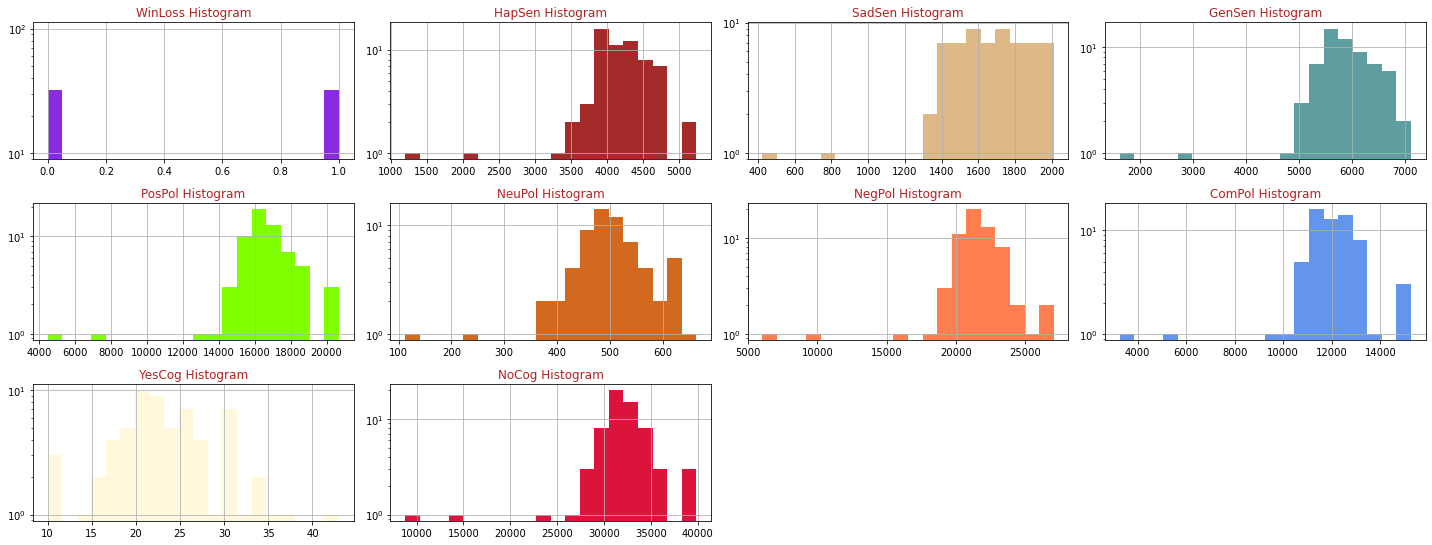

In [144]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.show()
draw_histograms(df,df.columns,8,4)

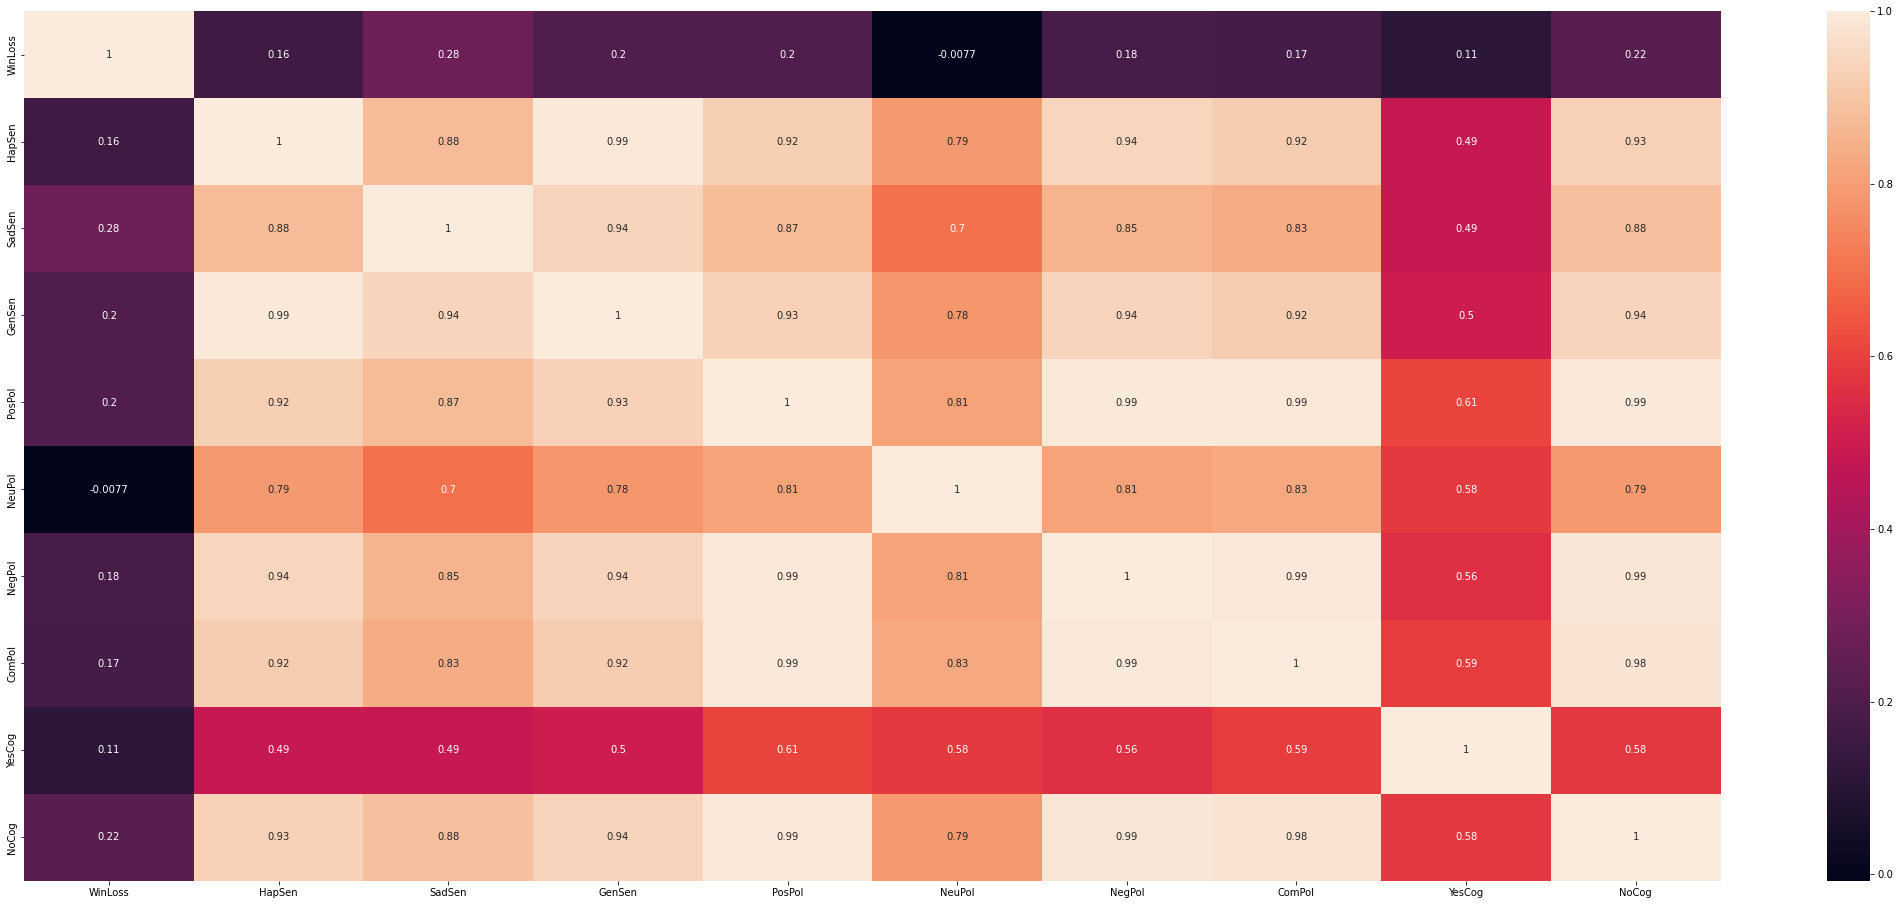

In [145]:
plt.figure(figsize = (38,16))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [146]:
model = LogisticRegression()

In [147]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [148]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 70.58823529411765


In [149]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [150]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 84.61538461538461


In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.78      1.00      0.88         7

    accuracy                           0.85        13
   macro avg       0.89      0.83      0.84        13
weighted avg       0.88      0.85      0.84        13



Text(0.5, 33.0, 'Predicted Values')

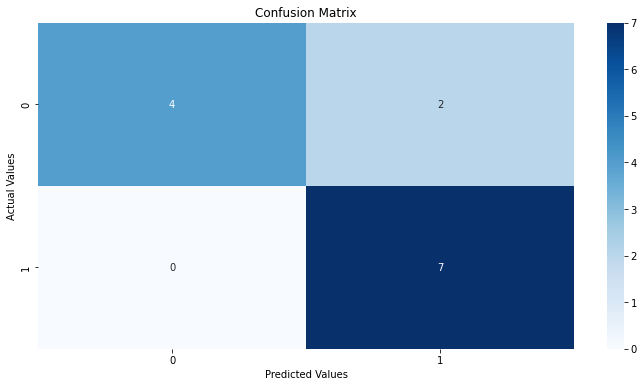

In [152]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")